<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plant-growth-as-a-function-of-the-temperature-sum" data-toc-modified-id="Plant-growth-as-a-function-of-the-temperature-sum-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plant growth as a function of the temperature sum</a></span><ul class="toc-item"><li><span><a href="#First-step:-A-function-to-calculate-the-temperature-sum" data-toc-modified-id="First-step:-A-function-to-calculate-the-temperature-sum-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First step: A function to calculate the temperature sum</a></span><ul class="toc-item"><li><span><a href="#A-function-for-the-temperature-sum" data-toc-modified-id="A-function-for-the-temperature-sum-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>A function for the temperature sum</a></span></li></ul></li><li><span><a href="#Second-step:-A-function-that-reuses-the-previous-one,-to-calculate-the-temperature-sum-for-each-day" data-toc-modified-id="Second-step:-A-function-that-reuses-the-previous-one,-to-calculate-the-temperature-sum-for-each-day-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Second step: A function that reuses the previous one, to calculate the temperature sum for each day</a></span><ul class="toc-item"><li><span><a href="#A-function-for-many-temperature-sums-at-once" data-toc-modified-id="A-function-for-many-temperature-sums-at-once-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>A function for many temperature sums at once</a></span></li></ul></li><li><span><a href="#Third-step:-Calculating-plant-growth" data-toc-modified-id="Third-step:-Calculating-plant-growth-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Third step: Calculating plant growth</a></span><ul class="toc-item"><li><span><a href="#A-function-to-calculate-plant-growth" data-toc-modified-id="A-function-to-calculate-plant-growth-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>A function to calculate plant growth</a></span></li></ul></li></ul></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li></ul></div>

# A simple plant height growth model

Taken from: *Introduction ot mathematical modeling of crop growth*, by Christopher Teh. 
(published in 2006 by BrownWalker Press)

## Plant growth as a function of the temperature sum

We will show the usage of python functions with a simple model of plant growth.

The idea behind this model is that plants grow more when the temperatures are higher, but stop growing at some point. This point is the maximum growth. The growth is then a function(!) of the temperature. This temperature is only taken into account if it surpasses a ___base temperature___, which is dependent on the plant. 

$$ \huge h_{ts}  =  \frac{ h_m }{ 1 + b_0 \cdot e^{-b_1 \cdot T_{\Sigma_{ts}}}} $$

Where:

$\large h_{ts}: $ height at time $s$ in $[m]$

$\large h_{m}: $ maximum possible height of the plant in $[m]$

$\large b_0: $ intercept parameter (unitless)

$\large b_1: $ slope parameter in $[^\circ C^{-1} \cdot day^{-1} ]$

$\large T_{\Sigma_{ts}} :$ temperature sum (above the base temperature) at time $s$ in $[^\circ C \cdot day ]$

### First step: A function to calculate the temperature sum

Let's suppose a number of daily average temperatures over 9 days:

In [6]:
t = [ item+1 for item in range(9) ]
temp_avg = [ 4, 5, 8, 10, 12, 10, 8, 5, 8 ]
temp_base = 5 # General plant growth - Table 7.6, pag. 153

In [7]:
print( t )

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff();

In [13]:
def makegraph():
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

    ax.plot( t, temp_avg, linewidth=3, marker='s', markersize=10, color='red', label='Daily average temperaure' )
    ax.plot( t, [temp_base]*len(t), linewidth=3, color='green', label='Base temperature' )

    ax.set_ylabel( 'Temperature $[^\circ C]$', fontsize=14 )
    ax.set_xlabel( 'Time [$days$]', fontsize=14 )

    ax.legend()
    
    plt.show()

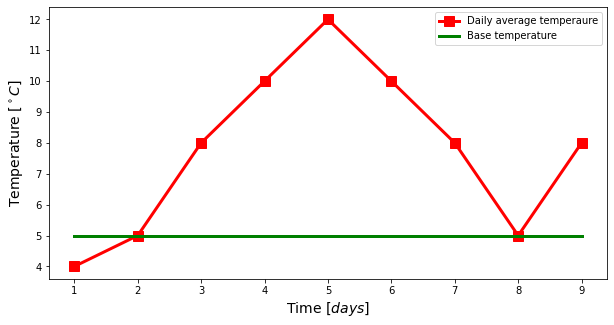

In [14]:
makegraph()

#### A function for the temperature sum

Now, a function that calculates the temperature sum after those 9 days:

In [24]:
def temperature_sum( temp_avgs, temp_base ):

    temperatures_above = []
    for element in temp_avgs:
        temperatures_above = temperatures_above + [ element - temp_base ]
#        print( temperatures_above )

    temperature_sum = 0
    for element in temperatures_above:
        if element>0:
            temperature_sum = temperature_sum + element
#        print( temperature_sum )

    return temperature_sum

We had, from before, two variables already:

In [16]:
print( temp_avg )
print( temp_base )

[4, 5, 8, 10, 12, 10, 8, 5, 8]
5


The function is then called with the variables previously defined:

In [25]:
print( temperature_sum( temp_avg, temp_base ) )

26


Note that that is the temperature sum (in $[^\circ C \cdot day]$) after the whole 9 days!!

It is possible to reuse the function with a different number of days in the first list, as it was not defined to iterate exactly 9 times:

In [30]:
print( temperature_sum( [4, 5, 8], temp_base ) )
print( temperature_sum( [4, 5, 8, 10, 12], temp_base ) )
print( temperature_sum( [4, 5, 8, 10, 12, 10, 8, 5, 8], temp_base ) )

3
15
26


We will use this fact to create a list of average sums up to each day, from day 1, 1 to 2, 1 to 3 and so on.

### Second step: A function that reuses the previous one, to calculate the temperature sum for each day

We can reuse the defined function using a ___for___ loop in the following way:

In [33]:
day_temperature_sums = []
for i in range(len(temp_avg)):
    day_temperature_sums = day_temperature_sums + [ temperature_sum( temp_avg[:i+1], temp_base ) ]
print( day_temperature_sums )

[0, 0, 3, 8, 15, 20, 23, 23, 26]


#### A function for many temperature sums at once

Alternatively, we can define a second function, wrap that piece of program in it, and use it afterwards.

In [36]:
def day_temperature_sums( temp_avgs, temp_base ):
    
    day_temperature_sums = []
    for i in range(len(temp_avgs)):
        current_sum = temperature_sum( temp_avgs[:i+1], temp_base )
        day_temperature_sums = day_temperature_sums + [ current_sum ]
#        print( i, current_sum, day_temperature_sums ) # Activate this line to see partial results
        
    return day_temperature_sums

In [37]:
dts = day_temperature_sums( temp_avg, temp_base )
print( dts )

[0, 0, 3, 8, 15, 20, 23, 23, 26]


We can then have a look a the cummulative temperatures over the 9-days range

In [40]:
def makegraph():
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

    ax.plot( t, temp_avg, linewidth=3, marker='s', markersize=10, color='red', label='Daily average temperaure' )
    ax.plot( t, dts, linewidth=3, marker='*', markersize=10, color='blue', label='Daily temperaure sum above base' )
    ax.plot( t, [temp_base]*len(t), linewidth=3, color='green', label='Base temperature' )

    ax.set_ylabel( 'Temperature $[^\circ C]$', fontsize=14 )
    ax.set_xlabel( 'Time [$days$]', fontsize=14 )

    ax.legend()
    
    plt.show()

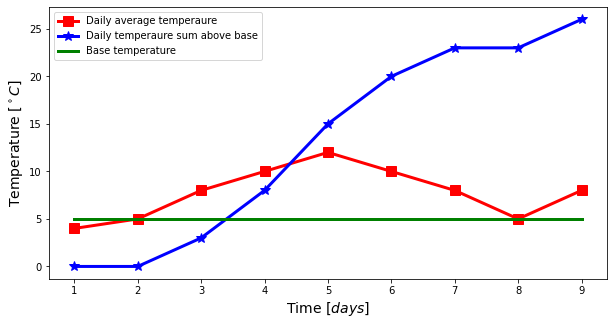

In [41]:
makegraph()

### Third step: Calculating plant growth

Lastly, having the temperature sums for each day, we can calculate the plant height growth for each day using the formula from Mr. Teh:

$$ \huge h_{ts}  =  \frac{ h_m }{ 1 + b_0 \cdot e^{-b_1 \cdot T_{\Sigma_{ts}}}} $$

The formula includes other parameters: plant maximum height and two coefficients (most commonly from field experiments).
    
We therefore define a function that accepts all four parameters.

#### A function to calculate plant growth

In [43]:
def plant_height( temperature_sum, hm, b0, b1 ):
    
    import numpy as np
    
    return hm / ( 1 + b0 * np.exp( -1 * b1 * temperature_sum ) )

It is a very simple function: it accepts four parameters, makes a calculation and returns a single value, meaning the height of the plants under those conditions.

Note the use of the ___numpy___ library. It is a very useful library for mathematical calculations. Its name stands for "numeric python", and we need it here to calculate the exponential function in the denominator.

To test the function, we will suppose a maximum plant height of 60 cm, and two coefficientes $b_0=10$ and $b_1=0.05$.

In [44]:
b0 = 10
b1 = 0.05
max_height = 0.6 # in meters

heights = []
for element in dts:
    current_height = plant_height( element, max_height, b0, b1 )
    heights = heights + [ current_height ]
#    print( element, current_height, heights ) # Activate this line to see partial results

print( heights )

[0.05454545454545454, 0.05454545454545454, 0.06245394175165406, 0.07788970351840495, 0.1048279283837693, 0.12823816291174578, 0.14401033324404555, 0.14401033324404555, 0.1610600789568635]


Lastly, a graph to see how the plants' growth increases with the given temperatures:

In [46]:
def makegraph():
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

    ax.plot( t, heights, linewidth=2, marker='o', markersize=10, color='black', label='Cummulative growth' )

    ax.set_ylabel( 'Growth in height $[m]$', fontsize=14 )
    ax.set_xlabel( 'Time [$days$]', fontsize=14 )

    ax.legend()

    plt.show()

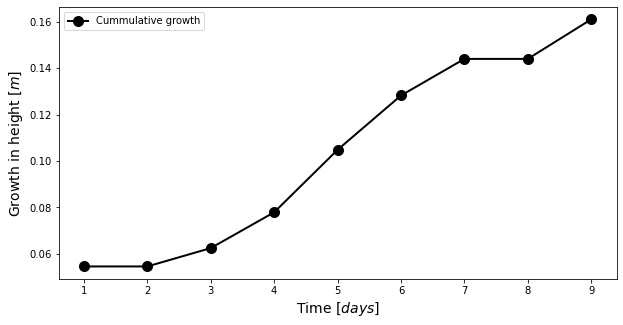

In [47]:
makegraph()

In [58]:
def makegraph():
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

    ax.plot( t, temp_avg, linewidth=3, marker='s', markersize=10, color='red', label='Daily average temperaure' )
    ax.plot( t, dts, linewidth=3, marker='*', markersize=10, color='blue', label='Daily average temperaure' )
    ax.plot( t, [temp_base]*len(t), linewidth=3, color='green', label='Base temperature' )

    ax.set_ylabel( 'Temperature $[^\circ C]$', fontsize=14 )
    ax.set_xlabel( 'Time [$days$]', fontsize=14 )

    axR = fig.add_subplot(111, sharex=ax, frameon=False)
    axR.plot( t, heights, linewidth=2, marker='o', markersize=10, color='black', label='Cummulative growth' )
    axR.set_ylabel( 'Growth in height $[m]$', fontsize=14 )
    axR.yaxis.tick_right()
    axR.yaxis.set_label_position("right")

    ax.legend()
    axR.legend(loc=1)

    plt.show()

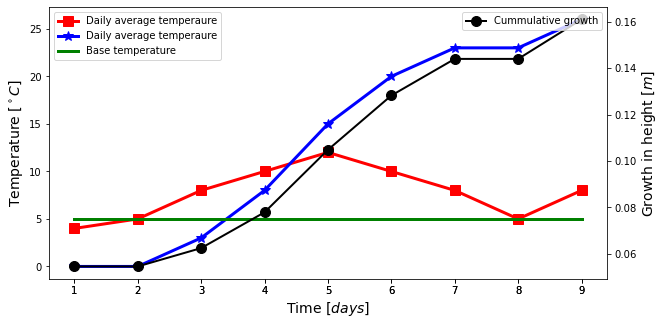

In [59]:
makegraph()

## Libraries

Sometimes, we are happy with a piece of code and hope to use it again in the future. We can then save it to a file in the hard disk, and later on call the functions in it without bothering to copy-paste the code each time. 

Files containing functions (or constants) are called ___libraries___, and build a very important part of many programming projects.

There is a number of libraries already written and ready-to-use (remember _pysolar_?), but we can also make our own, either to share or to use them ourselves.

A library is just the code saved in a raw-text file.

We will make a library with the functions defined previously for the plant height growth calculation.

<img src='../misc/img/library.png' width='800'>

To use a custom library, we use the ___import___ statement, which we used before for ___numpy___.

We can either import the whole library:

In [61]:
import plantheight

Or single functions that we need:

In [ ]:
from plantheight import day_temperature_sums

If we import the complete library, we can use it like follows (it is the same example):

In [65]:
import plantheight

temp_avg = [ 4, 5, 8, 10, 12, 10, 8, 5, 8 ]
temp_base = 1

dts = plantheight.day_temperature_sums( temp_avg, temp_base )

b0 = 10
b1 = 0.05
max_height = 0.9 # in meters

heights = []
for element in dts:
    current_height = plantheight.plant_height( element, max_height, b0, b1 )
    heights = heights + [ current_height ]

print( heights )

[0.09368091262748109, 0.11184457822839206, 0.15085856025623398, 0.21601549986606833, 0.3183772393583522, 0.41573480907626137, 0.49427465568372986, 0.5382597650358708, 0.6107536436755555]


Note that we access a function in a library using the dot operator ___.___

---